<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/book2/30/dp_mixgauss_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample some 2d data from a Dirichlet process mixture of Gaussians.

In [1]:
try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 4.3 MB/s 
     |████████████████████████████████| 88 kB 5.5 MB/s 
     |████████████████████████████████| 119 kB 55.7 MB/s 
     |████████████████████████████████| 72 kB 656 kB/s 
     |████████████████████████████████| 1.1 MB 42.3 MB/s 


In [2]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging
logger = logging.getLogger() 

class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

In [3]:
from probml_utils.dp_mixgauss_utils import dp_mixgauss_sample, NormalInverseWishart

In [4]:
import jax.numpy as jnp
from jax import random, vmap
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

In [5]:
# Example
dim = 2
# Set the hyperparameter for the NIW distribution
hyper_params = dict(loc=jnp.zeros(dim), mean_precision=0.05, df=dim + 5, scale=jnp.eye(dim))
# Generate the NIW object
dp_base_measure = NormalInverseWishart(**hyper_params)
key = random.PRNGKey(0)
num_of_samples = 1000
dp_concentrations = jnp.array([1.0, 2.0])
key, *subkeys = random.split(key, 3)
# Sampling from the DP mixture distribution
cluster_means, cluster_covs, samples = vmap(dp_mixgauss_sample, in_axes=(0, None, 0, None))(
    jnp.array(subkeys), num_of_samples, dp_concentrations, dp_base_measure
)



In [24]:
!pwd

/content


In [6]:
from probml_utils import savefig, latexify

import os
#os.environ["LATEXIFY"] = "0"
os.environ["FIG_DIR"] = "/content"

#latexify(width_scale_factor=1, fig_height=1.5) 



dp_mixgauss_alpha0_samples0
saving image to /content/dp_mixgauss_alpha0_samples0.png
Figure size: [6. 4.]
dp_mixgauss_alpha0_samples1
saving image to /content/dp_mixgauss_alpha0_samples1.png
Figure size: [6. 4.]
dp_mixgauss_alpha0_samples2
saving image to /content/dp_mixgauss_alpha0_samples2.png
Figure size: [6. 4.]
dp_mixgauss_alpha1_samples0
saving image to /content/dp_mixgauss_alpha1_samples0.png
Figure size: [6. 4.]
dp_mixgauss_alpha1_samples1
saving image to /content/dp_mixgauss_alpha1_samples1.png
Figure size: [6. 4.]
dp_mixgauss_alpha1_samples2
saving image to /content/dp_mixgauss_alpha1_samples2.png
Figure size: [6. 4.]


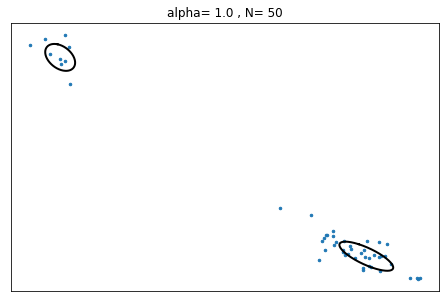

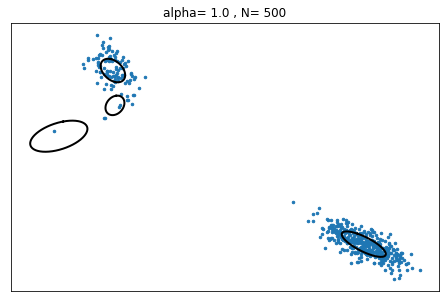

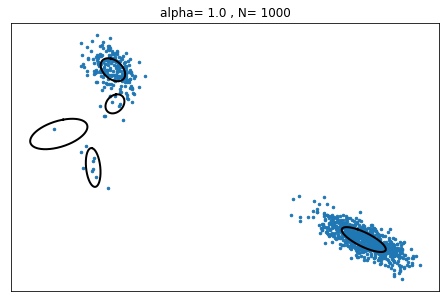

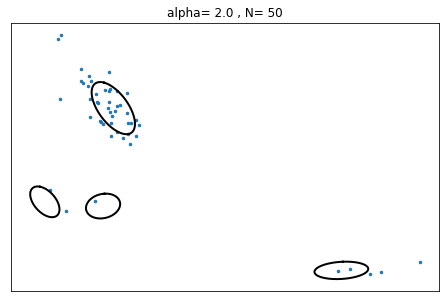

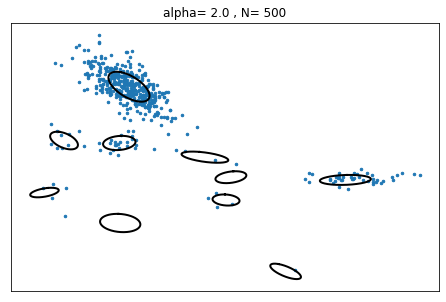

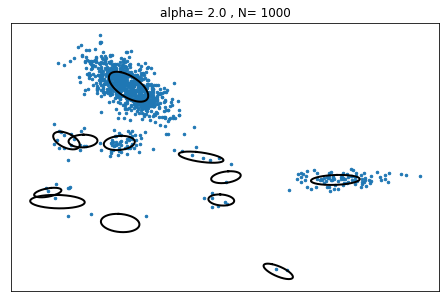

In [7]:
bb = jnp.arange(0, 2 * jnp.pi, 0.02)
sample_size = [50, 500, 1000]

n_alphas = len(dp_concentrations)
n_sizes = len(sample_size)

for i in range(n_alphas):
    cluster_mean = cluster_means[i]
    cluster_cov = cluster_covs[i]
    sample = samples[i]
    for j in range(n_sizes):
        s = sample_size[j]
        # plotting samples
        fig, ax = plt.subplots()
        ax.set_xticks([])
        ax.set_yticks([])
        ttl = f'alpha={dp_concentrations[i]: 0.1f} , N={sample_size[j]: 2d}'
        ax.set_title(ttl)
        fname = 'dp_mixgauss_alpha{:d}_samples{:d}'.format(i,j)
        print(fname)
        ax.plot(sample[:s, 0], sample[:s, 1], ".", markersize=5)

        # plotting covariance ellipses
        mu_per_cluster, indices = jnp.unique(cluster_mean[:s], return_index=True, axis=0)
        cov_per_cluster = cluster_cov[indices]
        cov_root_per_cluster = jnp.array([sqrtm(cov) for cov in cov_per_cluster])
        for mu, cov_root in zip(mu_per_cluster, cov_root_per_cluster):
            mu = jnp.atleast_2d(mu).T
            circ = mu.dot(jnp.ones((1, len(bb)))) + cov_root.dot(jnp.vstack([jnp.sin(bb), jnp.cos(bb)]))
            ax.plot(circ[0, :], circ[1, :], linewidth=2, color="k")

        pml.savefig(fname)
plt.show()

In [8]:
!ls

dp_mixgauss_alpha0_samples0.png  dp_mixgauss_alpha1_samples0.png  sample_data
dp_mixgauss_alpha0_samples1.png  dp_mixgauss_alpha1_samples1.png
dp_mixgauss_alpha0_samples2.png  dp_mixgauss_alpha1_samples2.png
